# Research Question
What risk factors are most predictive of diabetes risk?
Target Variable: Diabetes_binary


# Dataset Information
[Go to the ](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)


# Links
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
https://www.cdc.gov/mmwr/volumes/66/wr/mm6643a2.htm
https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
https://www.cdc.gov/pcd/issues/2019/19_0109.htm



1. Diabetes_binary
   0 = no diabetes 1 = prediabetes 2 = diabetes

2. HighBP
   0 = no high BP 1 = high BP

3. HighChol
   0 = no high cholesterol 1 = high cholesterol

4. CholCheck
   0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

5. BMI
   Body Mass Index

6. Smoker
   Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

7. Stroke
   (Ever told) you had a stroke. 0 = no 1 = yes

8. HeartDiseaseorAttack
   coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

9.  PhysActivity
    physical activity in past 30 days - not including job 0 = no 1 = yes

10. Fruits
    Consume Fruit 1 or more times per day 0 = no 1 = yes

11. Veggies
    Consume Vegetables 1 or more times per day 0 = no 1 = yes

12. HvyAlcoholConsump
    (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

13. AnyHealthcare
    Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

14. NoDocbcCost
    Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

15. GenHlth
    Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

16. MentHlth
    days of poor mental health scale 1-30 days

17. PhysHlth
    physical illness or injury days in past 30 days scale 1-30

18. DiffWalk
    Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
    
19. Sex
    0 = female 1 = male

20. Age
    13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

21. Education
    Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.

22. Income
    Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
    

In [5]:
import pandas as pd

# Define the path to the Excel file
file_path = r'C:\Users\david\OneDrive\Documents\GitHub\Research\CDC_Diabetes Research\diabetes_binary_5050split_health_indicators_BRFSS2015.xlsx'

# Use pandas to read the Excel file
data = pd.read_excel(file_path)

data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


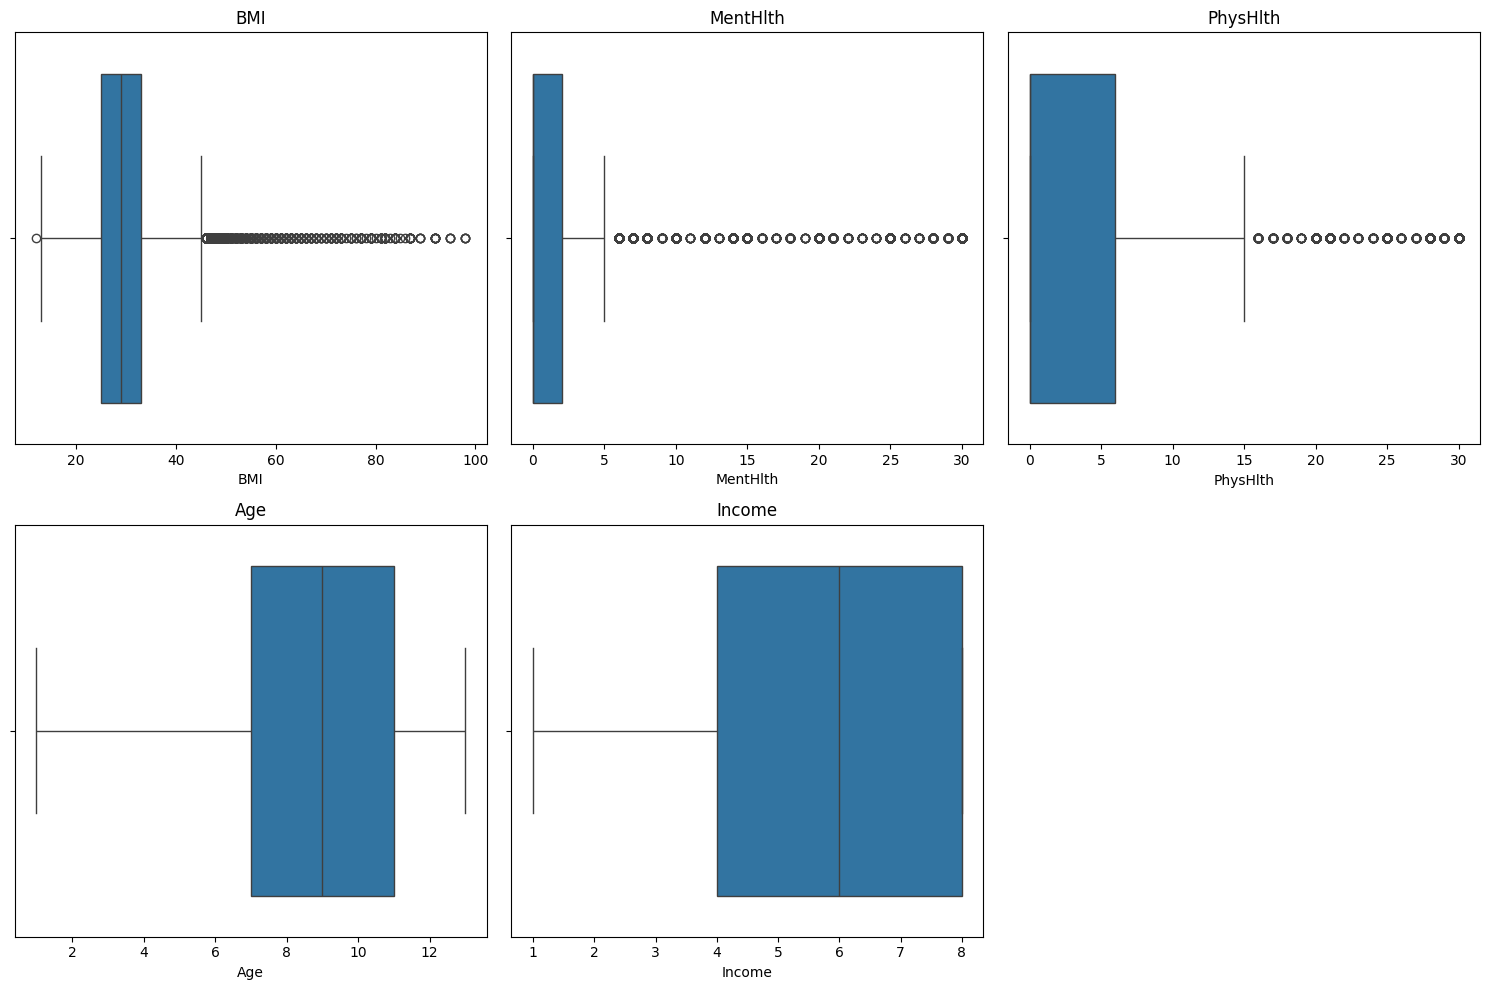

In [7]:
#  Data Exploration and Preprocessing

# Display basic information about the dataset
data_info = {
    "First 5 Rows": data.head(),
    "Data Shape": data.shape,
    "Basic Statistics": data.describe(),
    "Missing Values": data.isnull().sum()
}

data_info


# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous variables to check for outliers
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income']

# Creating box plots for each continuous variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data[var])
    plt.title(var)

plt.tight_layout()
plt.show()


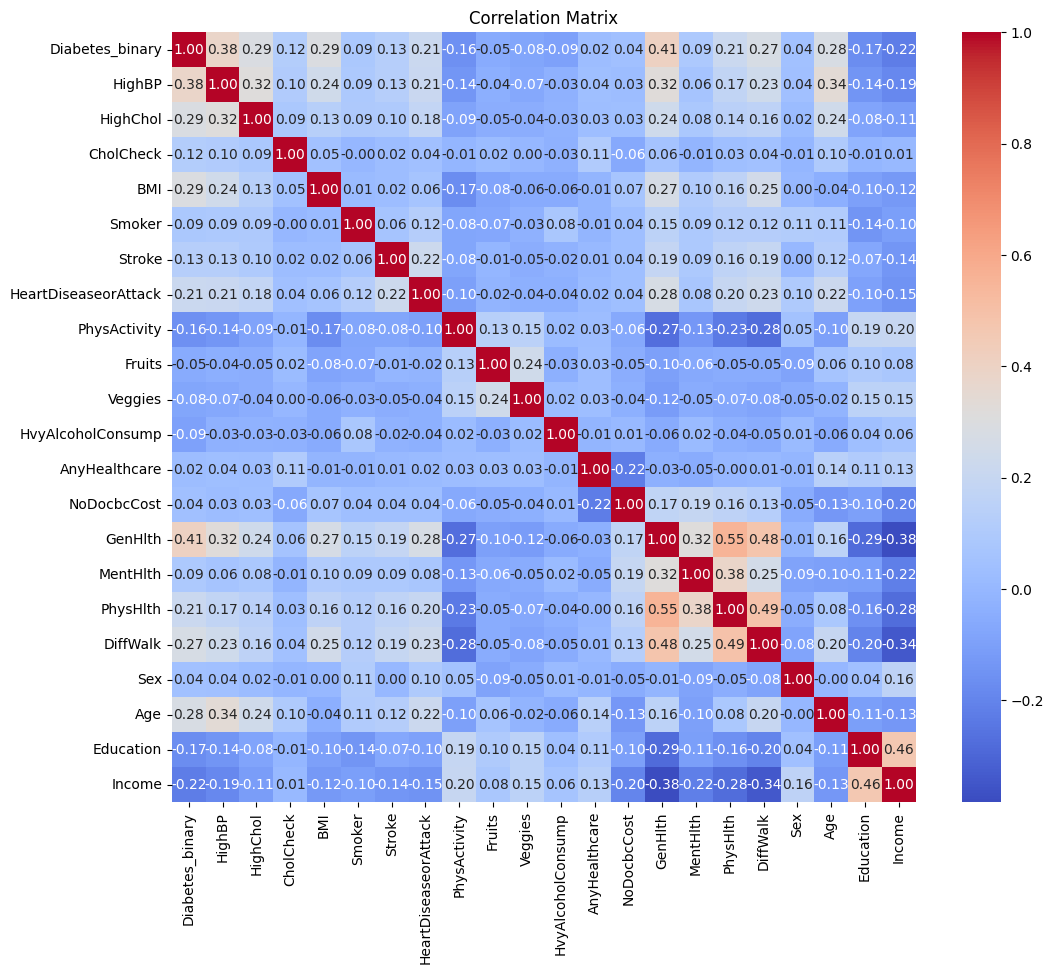

In [9]:
# Feature Selection and Engineering

from sklearn.preprocessing import StandardScaler

# Standardizing the continuous variables
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# Displaying the first 5 rows of the scaled data for verification
scaled_data_preview = data_scaled.head()
scaled_data_preview

# Calculating the correlation matrix
correlation_matrix = data_scaled.corr()

# Plotting the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Model Selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset into training and testing sets
X = data_scaled.drop('Diabetes_binary', axis=1)
y = data_scaled['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

(classification_rep, confusion_mat)


('              precision    recall  f1-score   support\n\n           0       0.76      0.73      0.74      7090\n           1       0.74      0.77      0.75      7049\n\n    accuracy                           0.75     14139\n   macro avg       0.75      0.75      0.75     14139\nweighted avg       0.75      0.75      0.75     14139\n',
 array([[5155, 1935],
        [1623, 5426]], dtype=int64))

In [11]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming data_scaled is your preprocessed dataset
X = data_scaled.drop('Diabetes_binary', axis=1)
y = data_scaled['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.76      0.69      0.73      7090
           1       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

[[4915 2175]
 [1551 5498]]


In [13]:
# XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.77      0.71      0.74      7090
           1       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

[[5009 2081]
 [1476 5573]]


In [14]:
# Support Vector Machine Classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Support Vector Machine Classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.77      0.70      0.74      7090
           1       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

[[4997 2093]
 [1463 5586]]


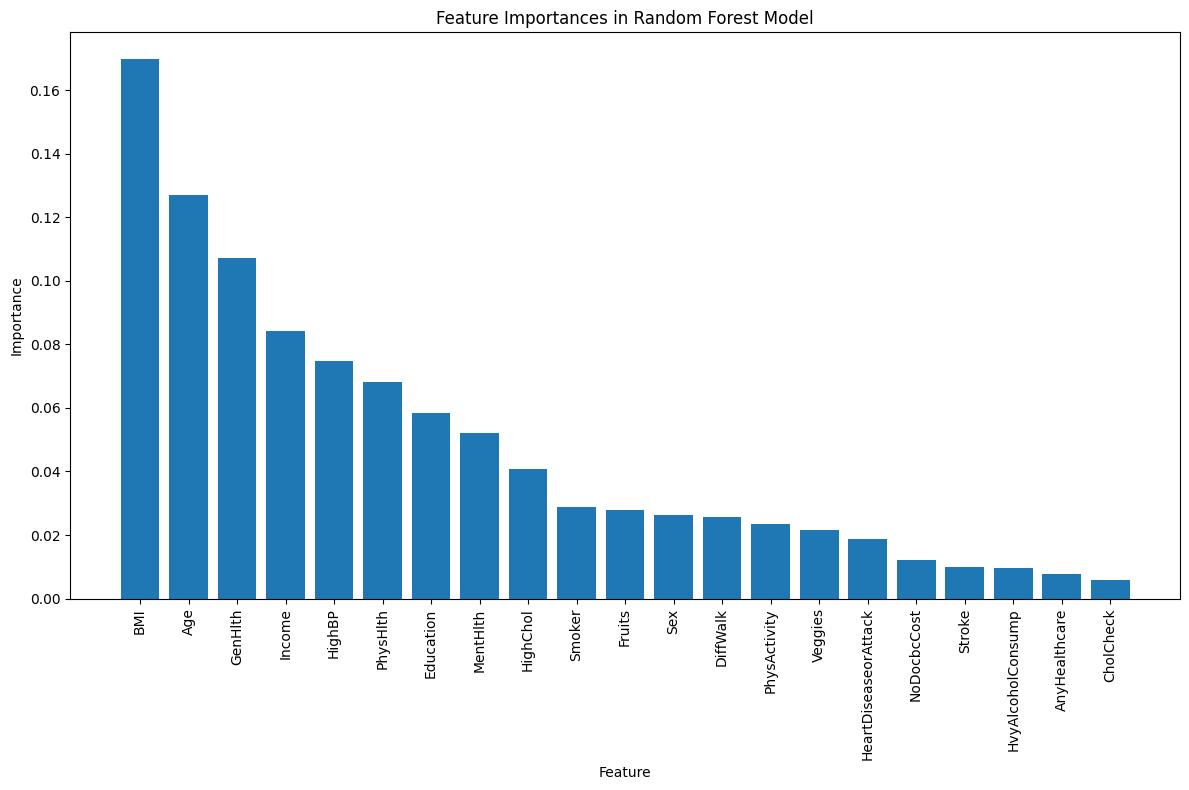

In [15]:
# Random Forest Feature Importance

import matplotlib.pyplot as plt
import numpy as np

# Assuming rf_clf is your trained Random Forest Classifier from earlier
feature_importances = rf_clf.feature_importances_
feature_names = X.columns

# Sorting the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances in Random Forest Model')
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


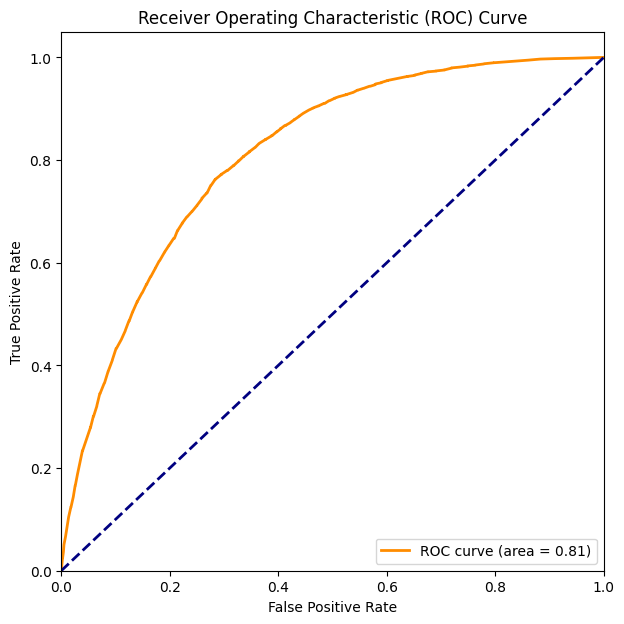

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming rf_clf is your trained Random Forest classifier
y_pred_probs = rf_clf.predict_proba(X_test)[:, 1]  # This extracts the probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


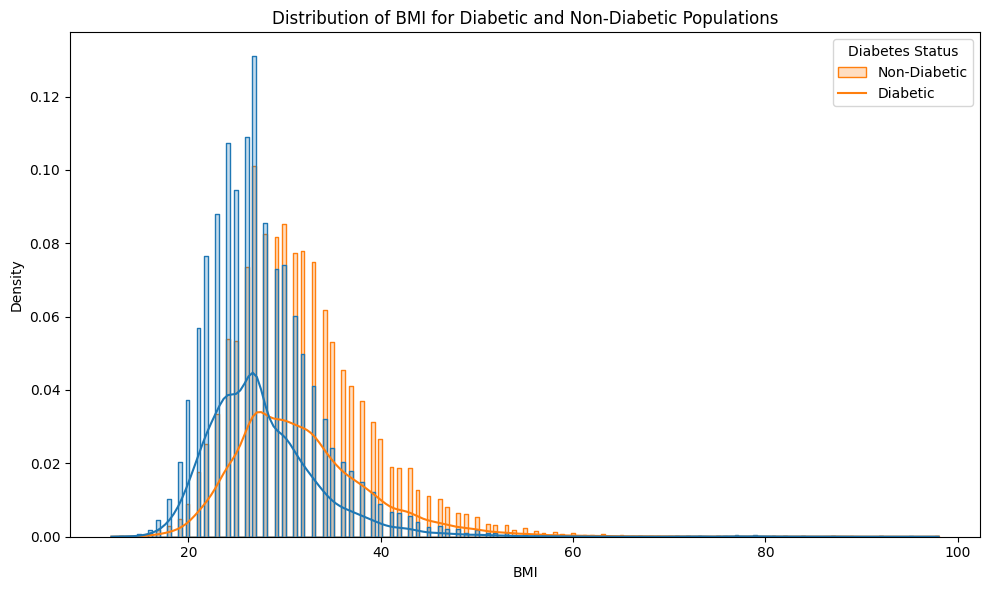

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'BMI' is a column in your DataFrame `data` and 'Diabetes_binary' is the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='BMI', hue='Diabetes_binary', kde=True, element='step', stat='density')
plt.title('Distribution of BMI for Diabetic and Non-Diabetic Populations')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(title='Diabetes Status', labels=['Non-Diabetic', 'Diabetic'])
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


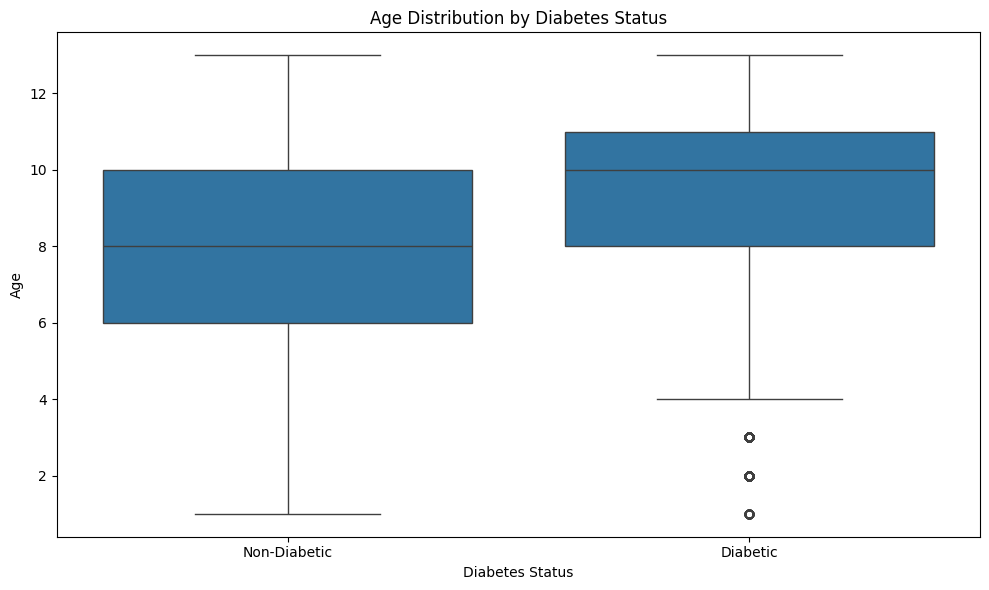

In [19]:
# Assuming 'Age' is a column in your DataFrame `data`
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_binary', y='Age', data=data)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


Drafting a Research Paper
The research paper should systematically present your study, findings, and insights. Here's an outline to guide the writing process:

Title
Choose a concise title that reflects the core focus of your research. For example: "Predictive Analysis of Risk Factors for Diabetes Using Machine Learning Techniques".

Abstract
A brief summary (150-250 words) that provides an overview of the research question, methodology, key findings, and implications.

Introduction
Background: Describe diabetes as a health problem, its impact, and the importance of identifying risk factors.
Problem Statement: Clearly articulate the research question.
Objectives: State the goal of using machine learning to identify predictive risk factors.
Contribution: Summarize the contribution your research makes to the existing body of knowledge.

Literature Review
Summarize existing studies on diabetes risk factors.
Discuss previous machine learning approaches to similar problems.
Highlight the gap your research intends to fill.

Methodology
Data Source: Introduce the Kaggle dataset and its relevance.
Data Preprocessing: Explain the steps taken to clean and prepare the data for analysis.
Model Selection: Discuss why you chose the Random Forest model and its relevance to the research question.
Model Training: Detail the process of training the model, including any hyperparameter tuning or validation strategies.

Results
Feature Importance: Present the findings on the most predictive risk factors for diabetes from the Random Forest model.
Model Performance: Discuss the model's performance metrics (accuracy, precision, recall, F1-score).
Interpretation: Interpret what the results mean in the context of the research question.

Discussion
Compare your findings with existing literature.
Discuss the implications of your findings for healthcare practitioners and policymakers.
Reflect on the limitations of your study and suggest areas for future research.

Conclusion
Summarize the key points from each section of the paper.
Reiterate the importance of your findings.
Conclude with remarks on the potential impact of this work.

References
Cite all the data sources, literature, and any tools (like Python libraries) you used in your research.

Appendices (if necessary)
Include any additional material that supports your paper but is too detailed for the main sections, like full model outputs or additional data visualizations.